![title](https://doity.com.br/media/doity/eventos/evento-20025-logo_organizador.png)

# Prova de Descoberta do Conhecimento

* **Prof. Cleilton Lima Rocha**
* **emails:** climarocha@gmail.com
* **deadline: 11/11 às 12h**

Para este projeto exploraremos os dados Call_Data disponível disponível na pasta.


Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em beats (hondas). A administração tem um dataset chamado Call_Data, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy).

O objetivo do nosso projeto é apoiar os policiais quanto as medidas prescritivas que eles devem tomar ao tentarem resolver uma chamada. Para isto eles têm disponível o histórico de tudo o que já foi resolvido, por ele e por seus colegas, e sua solução de Data Science capaz de prever a variável alvo da nossa prova será **Event Clearance Description**.

Boa prova e hands on!

**PS.:**
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100
* O título do email deve ser "Prova KDD - Turma 3 - [Membros da equipe]"
* Envie o código fonte e o report (File ==> Download As ==> Html ou PDF), com o nome dos membros da dupla, para um dos meus emails, climarocha@gmail.com até o dia **11/11 às 12h**.

# Questões

* **1. Importe o data set *call_data.csv* e considere a variável alvo 'Event Clearance Description'(0,5 pontos)** 
     * 1.1. Como está o balanceamento das classes?*
     * P.S.: Não é obrigatório aplicar o undersampling and oversampling sobre o dataset
     * P.S.: Se desejar você pode usar o dataset **call_data_small.csv** apenas pra agilizar o desenvolvimento no final tudo deve ser realizado com o **call_data.csv**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
call_data = pd.read_csv('call_data.csv')

**2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados (1,0 pontos)**
   * PS.: Utilize recursos visuais, por exemplo gráficos

In [4]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232442 entries, 0 to 232441
Data columns (total 12 columns):
Unnamed: 0                     232442 non-null int64
CAD Event Number               232442 non-null int64
Event Clearance Description    232442 non-null object
Call Type                      232442 non-null object
Priority                       232442 non-null int64
Initial Call Type              232442 non-null object
Final Call Type                232442 non-null object
Original Time Queued           232442 non-null object
Arrived Time                   232442 non-null object
Precinct                       232442 non-null object
Sector                         230892 non-null object
Beat                           232442 non-null object
dtypes: int64(3), object(9)
memory usage: 21.3+ MB


In [5]:
call_data.head()

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3
3,6,2009000189345,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
4,8,2009000189348,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

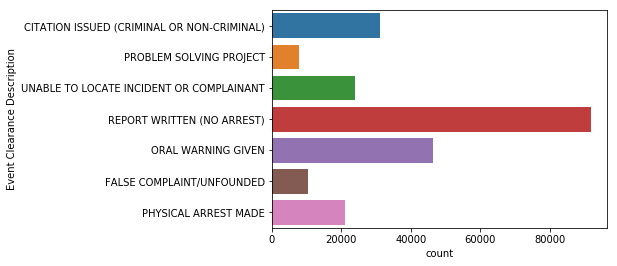

In [7]:
sbn.countplot(y='Event Clearance Description', data=call_data)

- 1.1 As Classes de Event Clearance Description estão desbalanceadas.

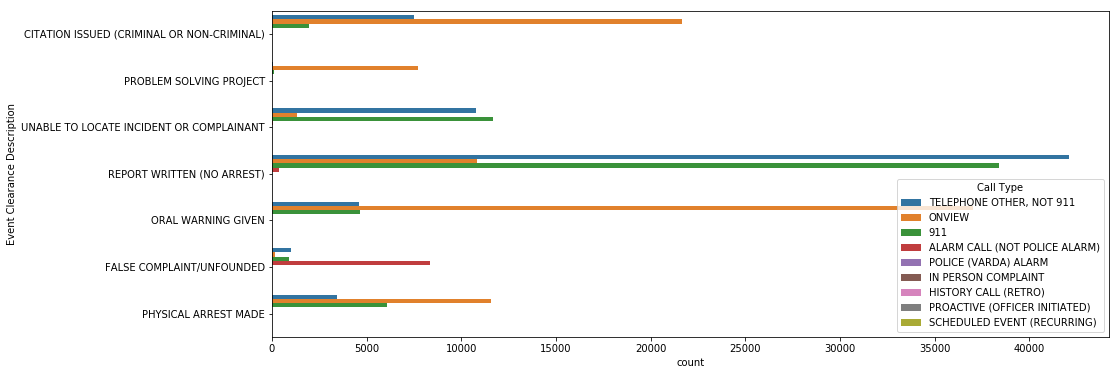

In [8]:
plt.figure(figsize = (15, 6))
sbn.countplot(y='Event Clearance Description', hue='Call Type', data=call_data)

In [9]:
Percent_different_call_type = call_data[call_data['Initial Call Type'] != call_data['Final Call Type']].count() / call_data.count() * 100 
print('%.2f' % Percent_different_call_type[0] + ' %')

97.35 %


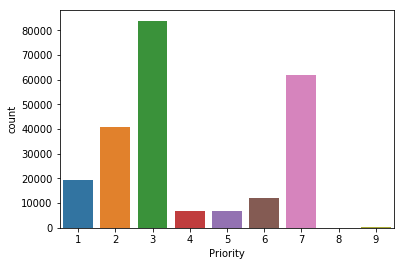

In [10]:
sbn.countplot(x='Priority', data=call_data)

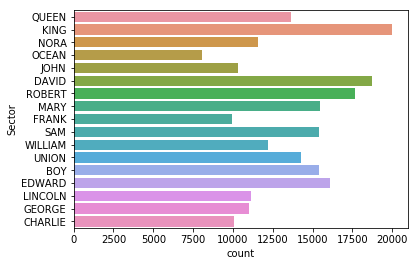

In [11]:
sbn.countplot(y='Sector', data=call_data)

**3. Realize o tratamento que você julgar mais adequado aos dados. (2,0 pontos)**
  * P.S.: Explique, com suas palavras, porque o processo de feature engineering é necessário
  * P.S.: A criação de um pipeline lhe dará pontos extras e melhorará o reaproveitamento de código

In [12]:
import seaborn as sbn

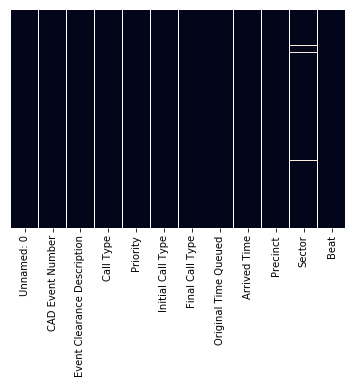

In [13]:
sbn.heatmap(data=call_data.isnull(), yticklabels=False, cbar=False)

In [14]:
len(call_data.index) - call_data.count()

Unnamed: 0                        0
CAD Event Number                  0
Event Clearance Description       0
Call Type                         0
Priority                          0
Initial Call Type                 0
Final Call Type                   0
Original Time Queued              0
Arrived Time                      0
Precinct                          0
Sector                         1550
Beat                              0
dtype: int64

In [15]:
call_data.dropna(inplace=True) # Eliminar os registros nulos, pois sua quantidade não impacta estatisticamente na análise.

In [16]:
call_data = call_data.drop(columns=['Unnamed: 0', 'CAD Event Number', 'Arrived Time']) # Eliminar colunas com missing ocultos, pois não tem valor de negócio.

In [17]:
# Transforma a dimensão de tempo.
data = pd.to_datetime(call_data['Original Time Queued'])
call_data['Year'] = data.dt.year
call_data['Month'] = data.dt.month
call_data['Day'] = data.dt.day
call_data['Weekday'] = data.dt.weekday
call_data['Hour'] = data.dt.hour

In [18]:
call_data.drop(columns='Original Time Queued', inplace=True)
call_data.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,Year,Month,Day,Weekday,Hour
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,WEST,QUEEN,Q1,2009,6,2,1,3
1,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",WEST,KING,K1,2009,6,2,1,3
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,NORTH,NORA,N3,2009,6,2,1,3
3,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,SOUTH,OCEAN,O1,2009,6,2,1,3
4,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,WEST,KING,K2,2009,6,2,1,3


In [19]:
# "Priority" se mantém para One Hot Encode, pois apesar de numérico, também é categórico com seu valor convertido para string.
call_data = pd.concat([call_data, pd.get_dummies(call_data[['Call Type','Priority','Initial Call Type', 'Final Call Type', 'Precinct', 'Sector', 'Beat']].astype(str))], axis=1) 
call_data.drop(['Call Type','Priority','Initial Call Type', 'Final Call Type', 'Precinct', 'Sector', 'Beat'], axis=1, inplace=True)
call_data.head()

,Event Clearance Description,Year,Month,Day,Weekday,Hour,Call Type_911,Call Type_ALARM CALL (NOT POLICE ALARM),Call Type_HISTORY CALL (RETRO),Call Type_IN PERSON COMPLAINT,...,Beat_R3,Beat_S1,Beat_S2,Beat_S3,Beat_U1,Beat_U2,Beat_U3,Beat_W1,Beat_W2,Beat_W3
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),2009,6,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PROBLEM SOLVING PROJECT,2009,6,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,2009,6,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,REPORT WRITTEN (NO ARREST),2009,6,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,REPORT WRITTEN (NO ARREST),2009,6,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230892 entries, 0 to 232441
Columns: 652 entries, Event Clearance Description to Beat_W3
dtypes: int64(5), object(1), uint8(646)
memory usage: 154.6+ MB


- A Engenharia de Features é necessária para transformar o dataset de entra num dataset tratado, com os dados pre processados, ou seja, 
preparados para ser a entrada dos modelos de Machine Learning com a melhor eficácia possível.

**4. Selecione duas soluções candidatas e justifique suas escolhas. Mostre os pontos negativos e positivos de cada modelo. (2,0 pontos)**

- Utilizarei DecisionTreeClassifier e RandomForestClassifier do Sklearn.
- O modelo de ávore de decisão, permite uma exploração baseada em dados de relações não-lineares e interações entre muitas variáveis explicativas, é um modelo mais fácil de visualizar  e interpretar, lida bem com grandes conjuntos de dados bem e podem prever tanto variáveis categóricas, como variáveis quantitativas, no entanto, pequenas mudanças nos dados podem levar a diferentes divisões, e isso pode prejudicar a interpretabilidade do modelo. Além disso, as árvores de decisão não são muito reproduzíveis com dados futuros.
- O modelo de floresta aleatória, pode ser utilizado tanto para regressão quanto para classificação e é fácil visualizar a importância relativa que ele atribui para cada característica na suas entradas, outra vantagem é que seus hiperparâmetros com valores default geralmente já produzem um bom resultado de predição, no entanto, uma quantidade grande de árvores pode tornar o algoritmo lento e ineficiente para predições em tempo real. Em geral, estes algoritmos são rápidos para treinar, mas muito lentos para fazer predições depois de treinados.

**5. Construa os modelos de aprendizagem de máquina para cada modelo (2,0 ponto)**    

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import  RandomForestClassifier 

In [22]:
x = call_data.drop(columns='Event Clearance Description')
y = call_data['Event Clearance Description']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [24]:
dtc = DecisionTreeClassifier()

In [25]:
model_dtc = dtc.fit(x_train, y_train)

In [26]:
predictions_dtc = model_dtc.predict(x_test)
predictions_dtc

array(['REPORT WRITTEN (NO ARREST)', 'REPORT WRITTEN (NO ARREST)',
       'REPORT WRITTEN (NO ARREST)', ..., 'REPORT WRITTEN (NO ARREST)',
       'REPORT WRITTEN (NO ARREST)', 'ORAL WARNING GIVEN'], dtype=object)

In [27]:
rfc = RandomForestClassifier()

In [28]:
model_rfc = rfc.fit(x_train, y_train)

In [29]:
predictions_rfc = model_rfc.predict(x_test)
predictions_rfc

array(['REPORT WRITTEN (NO ARREST)', 'REPORT WRITTEN (NO ARREST)',
       'REPORT WRITTEN (NO ARREST)', ..., 'PHYSICAL ARREST MADE',
       'REPORT WRITTEN (NO ARREST)', 'ORAL WARNING GIVEN'], dtype=object)

**6. Para cada modelo aplique uma combinação aos hiperparâmetros com o GridSearch e aplique também o CrossValidation (2,0 pontos)**
  * P.S.: Explique, com suas palavras, a necessidade de utilizar GridSearch e CrossValidation
  * P.S.: Explique a importância para de no mínimo um hiperparâmetro para cada modelo

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {'min_samples_leaf':[3,5,7], 
              'min_samples_split':[3,5,7], 
              'max_depth':[5,10,15], 
              'random_state': [100]}

In [32]:
clf_dtc = GridSearchCV(dtc, parameters, cv=3)

In [33]:
model_clf_dtc = clf_dtc.fit(x_train, y_train)
best_estimator_dtc = model_clf_dtc.best_estimator_

In [34]:
best_estimator_dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [35]:
clf_rfc = GridSearchCV(rfc, parameters, cv=3)

In [36]:
model_clf_rfc = clf_rfc.fit(x_train, y_train)
best_estimator_rfc = model_clf_rfc.best_estimator_

In [37]:
best_estimator_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

- O GridSerach verifica, dentre as combinações de hiperparâmetros, quais darão melhor resultado para os dados de treino em determinado modelo, 
 possibilitando melhor avaliação do modelo com seus hiperparâmetros otimizados.
- O Cross Validation permite que o modelo seja avaliado por combinações de dados diferentes dos que inicialmente lhe serviram como treinamento, aperfeiçoando a validação do modelo.

**7. Defina uma métrica de avaliação e avalie as soluções candidatas. Justifique a escolha da sua métrica. (1,0 ponto)**

In [38]:
predictions_dtc = best_estimator_dtc.predict(x_test)
print(classification_report(y_test,predictions_dtc))

                                            precision    recall  f1-score   support

CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)       0.67      0.78      0.72      9274
                 FALSE COMPLAINT/UNFOUNDED       0.96      0.84      0.90      3153
                        ORAL WARNING GIVEN       0.72      0.67      0.69     13797
                      PHYSICAL ARREST MADE       0.76      0.51      0.61      6389
                   PROBLEM SOLVING PROJECT       0.89      0.82      0.86      2127
                REPORT WRITTEN (NO ARREST)       0.80      0.93      0.86     27515
  UNABLE TO LOCATE INCIDENT OR COMPLAINANT       0.58      0.37      0.45      7013

                                 micro avg       0.76      0.76      0.76     69268
                                 macro avg       0.77      0.70      0.73     69268
                              weighted avg       0.75      0.76      0.74     69268



In [39]:
predictions_rfc = best_estimator_rfc.predict(x_test)
print(classification_report(y_test,predictions_rfc))

                                            precision    recall  f1-score   support

CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)       0.64      0.84      0.72      9274
                 FALSE COMPLAINT/UNFOUNDED       0.98      0.80      0.88      3153
                        ORAL WARNING GIVEN       0.74      0.57      0.64     13797
                      PHYSICAL ARREST MADE       0.89      0.30      0.44      6389
                   PROBLEM SOLVING PROJECT       0.90      0.77      0.83      2127
                REPORT WRITTEN (NO ARREST)       0.68      0.97      0.80     27515
  UNABLE TO LOCATE INCIDENT OR COMPLAINANT       0.78      0.02      0.04      7013

                                 micro avg       0.70      0.70      0.70     69268
                                 macro avg       0.80      0.61      0.62     69268
                              weighted avg       0.73      0.70      0.65     69268



- A Métrica escolhida é a Média Ponderada do F1 Score, pois agrega as avaliações de Precisão e Recall para cada classe.
- A melhor Média Ponderada do F1 Score foi o do modelo de Árvore de Decisão com ~74%

**8. Escolha um dos modelos, por exemplo o melhor modelo, e faça uma análise do overfitting e underfitting. Justique sua resposta com base em experimentos. (1,5 pontos)**
   * Analise no mínimo 2 hiperparâmetros e também o número de amostras utilizado no treinamento
   * Utilize recursos visuais, por exemplo gráficos, se você achar neccessário

In [40]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

In [41]:
def model_complexity(estimator, title, param_name, values_param, scoring, X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Vary the max_depth parameter from 1 to 10

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(estimator, X, y, \
        param_name = param_name, param_range = values_param, cv = cv, scoring = scoring)

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    ylim=(0.7, 1.01)
    plt.ylim(*ylim)
    plt.title(title)
    plt.grid()
    plt.plot(values_param, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(values_param, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(values_param, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(values_param, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

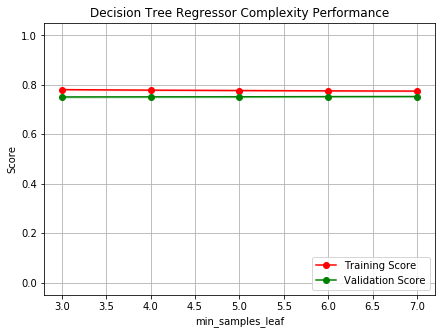

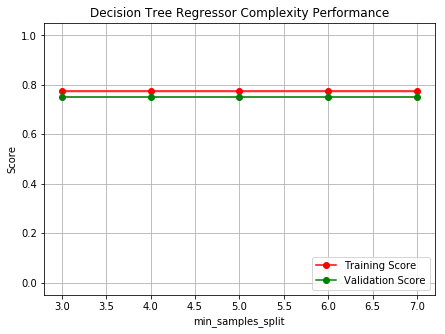

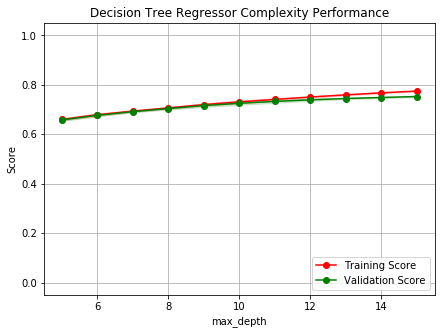

In [42]:
param_name_1 = 'min_samples_leaf'
param_name_2 = 'min_samples_split'
param_name_3 = 'max_depth'
values_param = np.arange(3,8)
values_param_2 = np.arange(5,16)
scoring='accuracy'
title='Decision Tree Regressor Complexity Performance'
model_complexity(best_estimator_dtc, title, param_name_1, values_param, scoring, x, y)
model_complexity(best_estimator_dtc, title, param_name_2, values_param, scoring, x, y)
model_complexity(best_estimator_dtc, title, param_name_3, values_param_2, scoring, x, y)

- Os Scores não tem grande variação em relação aos 2 primeiros hiperparametros, mas no 3º hiperparametro verificado, nota-se que quanto maior o max_depth, maiores os scores obtidos, sendo que, diferente do que foi proposto pelo GridSearch, o valor para este parâmetro que apresentaria o menor over fitting com melhor score, seria 10.

In [43]:
def plot_learning_curve(estimator, title, X, y,):
    
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=100)
    ylim=(0.7, 1.01)
    n_jobs=1
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

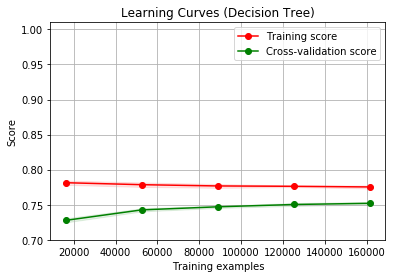

In [44]:
title = "Learning Curves (Decision Tree)"
a = plot_learning_curve(best_estimator_dtc, title, x, y)

- O número ideal de amostras é de 90.000, pois, como o gráfico demonstra, a parti dai, o score se estabiliza sem over fitting, pois o score de treino também se estabiliza.

**9. Realize a predição sobre os dado test_call_data, como o seu modelo saiu? (1,0 ponto)**

In [68]:
test_call_data = pd.read_csv('test_call_data.csv')

In [69]:
# Pré Processamento.
test_call_data.dropna(inplace=True) # Eliminar os registros nulos, pois sua quantidade não impacta estatisticamente na análise.

test_call_data = test_call_data.drop(columns=['Unnamed: 0', 'CAD Event Number', 'Arrived Time']) # Eliminar colunas com missing ocultos, pois não tem valor de negócio.

# Transforma a dimensão de tempo.
data = pd.to_datetime(test_call_data['Original Time Queued'])
test_call_data['Year'] = data.dt.year
test_call_data['Month'] = data.dt.month
test_call_data['Day'] = data.dt.day
test_call_data['Weekday'] = data.dt.weekday
test_call_data['Hour'] = data.dt.hour

test_call_data.drop(columns='Original Time Queued', inplace=True)

# "Priority" se mantém para One Hot Encode, pois apesar de numérico, também é categórico com seu valor convertido para string.
test_call_data = pd.concat([test_call_data, pd.get_dummies(test_call_data[['Call Type','Priority','Initial Call Type', 'Final Call Type', 'Precinct', 'Sector', 'Beat']].astype(str))], axis=1) 
test_call_data.drop(['Call Type','Priority','Initial Call Type', 'Final Call Type', 'Precinct', 'Sector', 'Beat'], axis=1, inplace=True)

In [70]:
x = test_call_data.drop(columns='Event Clearance Description')
y = test_call_data['Event Clearance Description']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [59]:
best_dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=7)

In [60]:
best_model_dtc = best_dtc.fit(x_train, y_train)

In [61]:
predictions_best_dtc = best_model_dtc.predict(x_test)
print(classification_report(y_test, predictions_best_dtc))

                                            precision    recall  f1-score   support

CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)       0.64      0.67      0.66       832
                 FALSE COMPLAINT/UNFOUNDED       0.97      0.76      0.85       326
                        ORAL WARNING GIVEN       0.72      0.66      0.69      1540
                      PHYSICAL ARREST MADE       0.69      0.34      0.46       640
                   PROBLEM SOLVING PROJECT       0.87      0.56      0.68       208
                REPORT WRITTEN (NO ARREST)       0.68      0.93      0.79      2553
  UNABLE TO LOCATE INCIDENT OR COMPLAINANT       0.50      0.25      0.34       794

                                 micro avg       0.69      0.69      0.69      6893
                                 macro avg       0.73      0.60      0.64      6893
                              weighted avg       0.68      0.69      0.67      6893



- A Média Ponderada do F1 Score na massa de teste foi de ~67%

**10. Se seu modelo permitir analisar a importância das features, analise-o e tente justificar de forma subjetiva a importância da feature. Por exemplo, a feature_chamadas_a_noite possui um alto coeficiente, pois há uma tendência dos crimes acontecerem a noite, não tão simples assim :P. (1,0 ponto)**

In [64]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# classifications
rfecv = RFECV(estimator=best_model_dtc, step=1, cv=StratifiedKFold(5))
rfecv = rfecv.fit(x_train, y_train)

print(x_train.columns.values[rfecv.support_])
print(rfecv.grid_scores_)

print("Optimal number of features : %d" % rfecv.n_features_)

['Month' 'Day' 'Weekday' 'Hour' 'Call Type_911'
 'Call Type_ALARM CALL (NOT POLICE ALARM)'
 'Call Type_HISTORY CALL (RETRO)' 'Call Type_IN PERSON COMPLAINT'
 'Call Type_ONVIEW' 'Call Type_PROACTIVE (OFFICER INITIATED)'
 'Call Type_TELEPHONE OTHER, NOT 911' 'Priority_1' 'Priority_2'
 'Priority_3' 'Priority_4' 'Priority_5' 'Priority_6' 'Priority_7'
 'Priority_9'
 'Initial Call Type_-ASSIGNED DUTY - COMMUNITY,SCHOOL,SPECIAL EVENT'
 'Initial Call Type_-ASSIGNED DUTY - DETAIL BY SUPERVISOR'
 'Initial Call Type_-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR)'
 'Initial Call Type_-ASSIGNED DUTY - IN-SERVICE TRAINING'
 'Initial Call Type_-ASSIGNED DUTY - REPORTS'
 'Initial Call Type_-ASSIGNED DUTY - STAKEOUT'
 'Initial Call Type_-ASSIGNED DUTY - STATION DUTY (CLERK,MAIL,ETC)'
 'Initial Call Type_-ELEMENTARY SCHOOL VISIT'
 'Initial Call Type_-GAS/MAINTENANCE/WASH/GARAGE'
 'Initial Call Type_-OUT OF CAR/NO REASON GIVEN'
 'Initial Call Type_-OUT TO PRECINCT/STATION'
 'Initial Call Type_-PRISONER E

- As Features mais importantes são "Sector" e "Beat", ou seja, Setor e a Ronda, features relacionadas à localização de origem da chamada, de forma a determinarem mais fortemente um maior número e determinada descrição de ocorrências.

 **11. Aplique clusterização, preferencialmente o KMeans sobre o dado, e comunique suas novas descobertas, sinta-se a vontade para apresentar uma solução com recursos visuais (2,0 pontos)**

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
scaler = MinMaxScaler()
values = scaler.fit_transform(x_train)

In [73]:
x_train = pd.DataFrame(values, columns = x_train.columns)

In [74]:
x_train.columns

Index(['Year', 'Month', 'Day', 'Weekday', 'Hour', 'Call Type_911',
       'Call Type_ALARM CALL (NOT POLICE ALARM)',
       'Call Type_HISTORY CALL (RETRO)', 'Call Type_IN PERSON COMPLAINT',
       'Call Type_ONVIEW',
       ...
       'Beat_R3', 'Beat_S1', 'Beat_S2', 'Beat_S3', 'Beat_U1', 'Beat_U2',
       'Beat_U3', 'Beat_W1', 'Beat_W2', 'Beat_W3'],
      dtype='object', length=467)

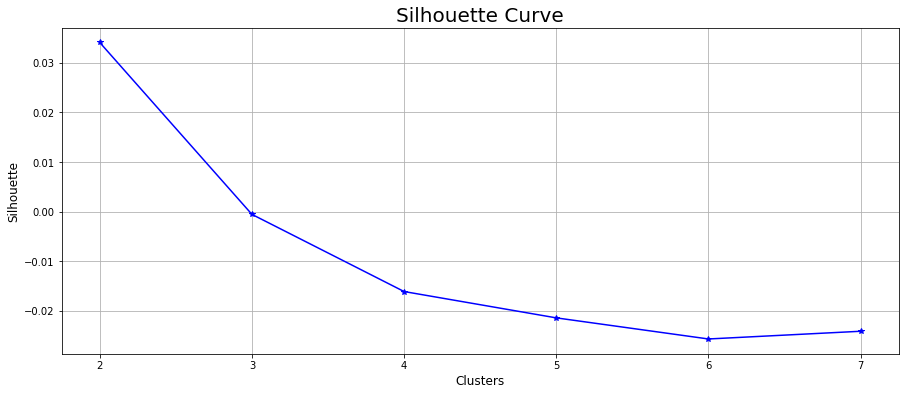

In [77]:
sil = []
for k in range(2, 8):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(x_train)
    sil.append(silhouette_score(x_test, kmeans_.predict(x_test)))

cluster = np.arange(2, 8)
sil = np.array(sil)

plt.figure(figsize = (15, 6))
plt.plot(cluster, sil, 'b*-')

plt.title("Silhouette Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Silhouette", fontsize = 12)

plt.xticks(cluster)
plt.grid()

plt.show()

- De acordo com o gráfico do Silhouette Score para cada quantidade de clusters testada, percebe-se que o melhor score se dá para a configuração de 2 clusters, para o modelo K-means, ou seja, clusterização sem os dados de entrada previamente rotulados por classe alvo(y). 

# Bom trabalho!